Problem Statement
Given a set of attributes for an Individual, determine if a credit line should be extended to them. Bascially to determine the creditworthiness of individuals.
If yes, what should the repayment terms and conditions.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
path ="/content/drive/MyDrive/Business_case_datasets/loan_tap.csv"
df = pd.read_csv(path)

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [ ]:
df.shape
#gives the total number of rows and columns

(396030, 27)

In [ ]:
#Getting the type of data in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [ ]:
df.nunique()
#getting unique values of each row

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48817
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

In [ ]:
#checking how many null values are present in each column in the data
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

We cannot drop columns having Nan values in them as there are a lot of datapoints. Hence replacing them with some placeholder is better.

In [ ]:
df["loan_status"]

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 396030, dtype: object

In [ ]:
# df.dropna(inplace=True)
#dropping all null values
#since number of rows are huge, losing some info is acceptable
#could have dropped all na rows earlier also

In [ ]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [ ]:
df.describe(include='all')
#gives us the statistical summary of the data

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
count,396030.000000,396030,396030.000000,396030.000000,396030,396030,373103,377729,396030,3.960300e+05,...,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,396030,396030,358235.000000,395495.000000,396030
unique,NaN,2,NaN,NaN,7,35,173105,11,6,NaN,...,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,393700
top,NaN,36 months,NaN,NaN,B,B3,Teacher,10+ years,MORTGAGE,NaN,...,NaN,NaN,NaN,NaN,NaN,f,INDIVIDUAL,NaN,NaN,USCGC Smith\r\nFPO AE 70466
freq,NaN,302005,NaN,NaN,116018,26655,4389,126041,198348,NaN,...,NaN,NaN,NaN,NaN,NaN,238066,395319,NaN,NaN,8
mean,14113.888089,NaN,13.639400,431.849698,NaN,NaN,NaN,NaN,NaN,7.420318e+04,...,11.311153,0.178191,1.584454e+04,53.791749,25.414744,NaN,NaN,1.813991,0.121648,NaN
std,8357.441341,NaN,4.472157,250.727790,NaN,NaN,NaN,NaN,NaN,6.163762e+04,...,5.137649,0.530671,2.059184e+04,24.452193,11.886991,NaN,NaN,2.147930,0.356174,NaN
min,500.000000,NaN,5.320000,16.080000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000,2.000000,NaN,NaN,0.000000,0.000000,NaN
25%,8000.000000,NaN,10.490000,250.330000,NaN,NaN,NaN,NaN,NaN,4.500000e+04,...,8.000000,0.000000,6.025000e+03,35.800000,17.000000,NaN,NaN,0.000000,0.000000,NaN
50%,12000.000000,NaN,13.330000,375.430000,NaN,NaN,NaN,NaN,NaN,6.400000e+04,...,10.000000,0.000000,1.118100e+04,54.800000,24.000000,NaN,NaN,1.000000,0.000000,NaN
75%,20000.000000,NaN,16.490000,567.300000,NaN,NaN,NaN,NaN,NaN,9.000000e+04,...,14.000000,0.000000,1.962000e+04,72.900000,32.000000,NaN,NaN,3.000000,0.000000,NaN


For the numerical columns, if the median ie 50% value is larger compared to the mean then we can say that there are a few outliers that affect mean value

In [ ]:
df.index = np.arange(1,df.shape[0]+1)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
1,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
2,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
3,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
4,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
5,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


Check how much target variable (Loan_Status) depends on different predictor variables (Use count plots, box plots, heat maps etc)

<Axes: xlabel='term', ylabel='count'>

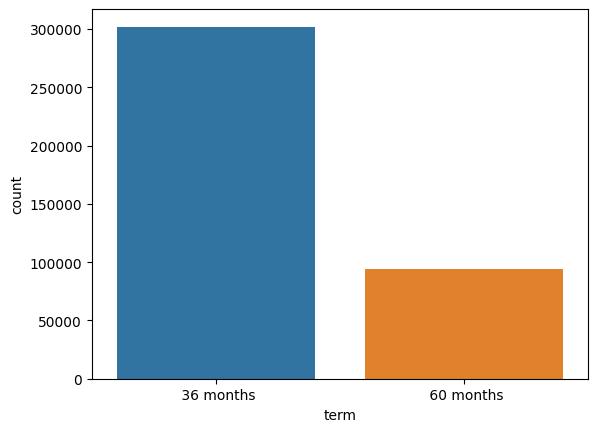

In [ ]:
sns.countplot(x=df['term'])
#majority of the people take a loan for 36 months

<Axes: xlabel='emp_length', ylabel='count'>

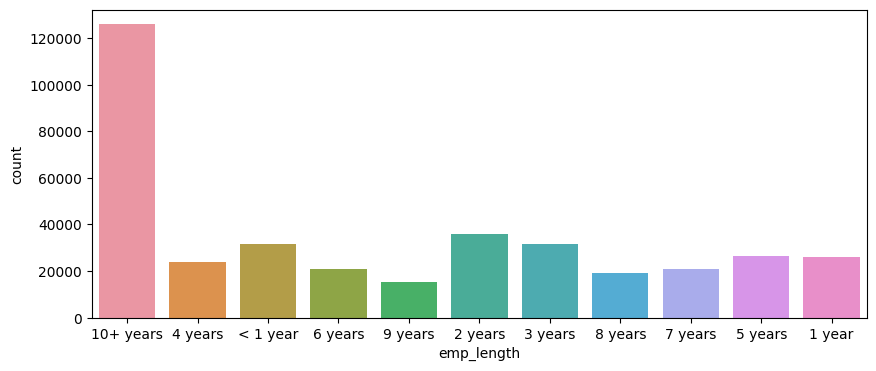

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x=df['emp_length'])
#people having employee term > 10 years take a loan

<Axes: xlabel='grade', ylabel='count'>

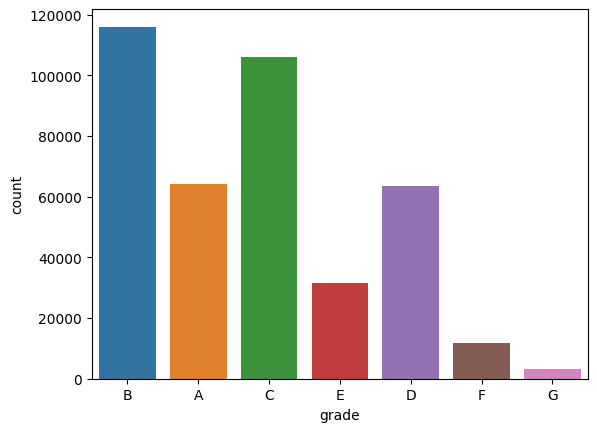

In [ ]:
sns.countplot(x=df['grade'])

<Axes: xlabel='loan_status', ylabel='count'>

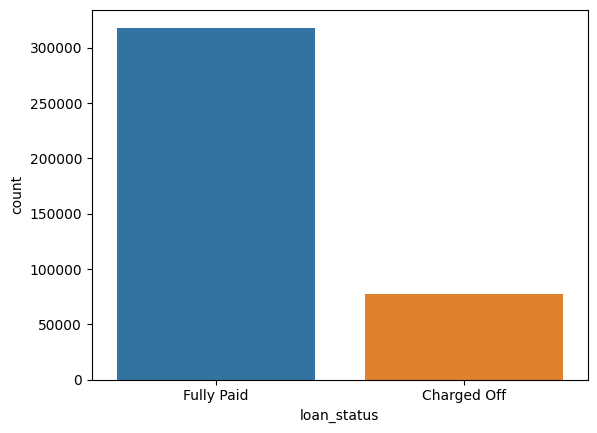

In [ ]:
sns.countplot(x=df['loan_status'])
#most people paid the loan back

<Axes: xlabel='purpose', ylabel='count'>

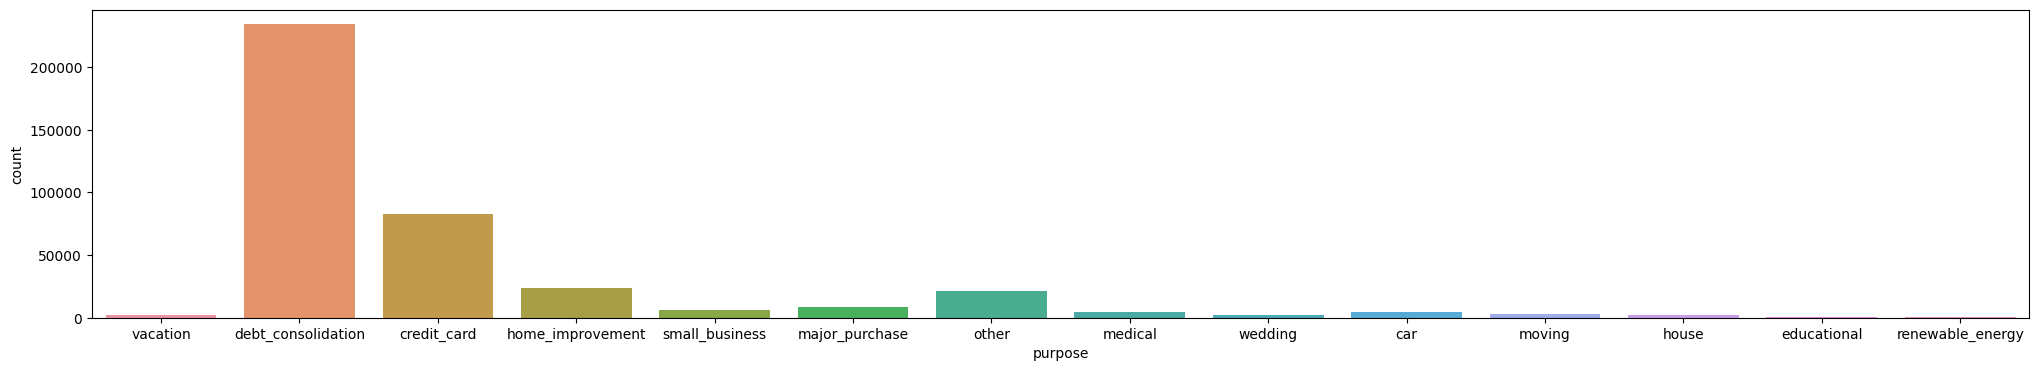

In [ ]:
plt.figure(figsize=(25,4))
sns.countplot(x=df['purpose'])
#most people took a loan for debt-consolidation followed by credit card

<Axes: xlabel='loan_status', ylabel='count'>

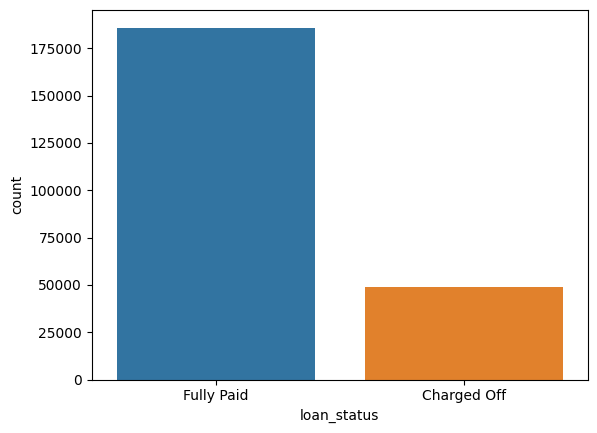

In [ ]:
df1 = df.loc[df['purpose']=='debt_consolidation']
sns.countplot(x=df1['loan_status'])
#naturally people who took a loan to clear a loan will have a good chunk of charged off entries. Also the number of rows for this purpose is also significant

<Axes: xlabel='loan_status', ylabel='count'>

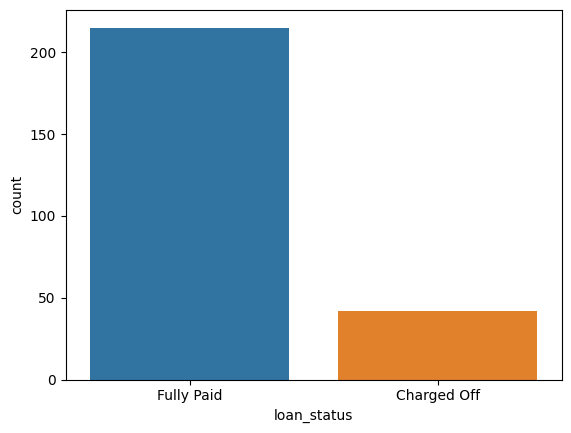

In [ ]:
df1 = df.loc[df['purpose']=='educational']
sns.countplot(x=df1['loan_status'])
#people who took an education loan were able to pay back the entire loan

<Axes: xlabel='loan_status', ylabel='count'>

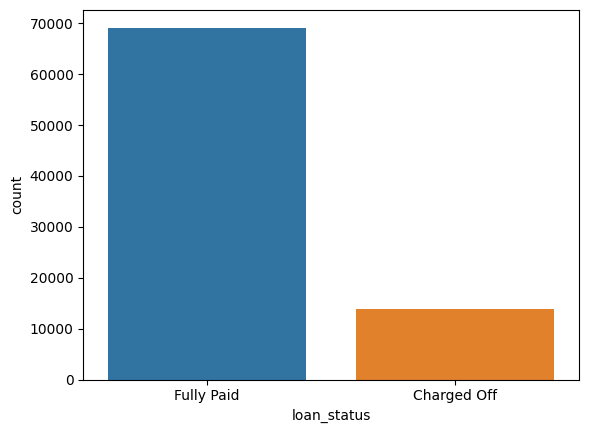

In [ ]:
df1 = df.loc[df['purpose']=='credit_card']
sns.countplot(x=df1['loan_status'])
#almost >1/6 credit card loan takers were unable to pay the loan

<Axes: xlabel='loan_status', ylabel='count'>

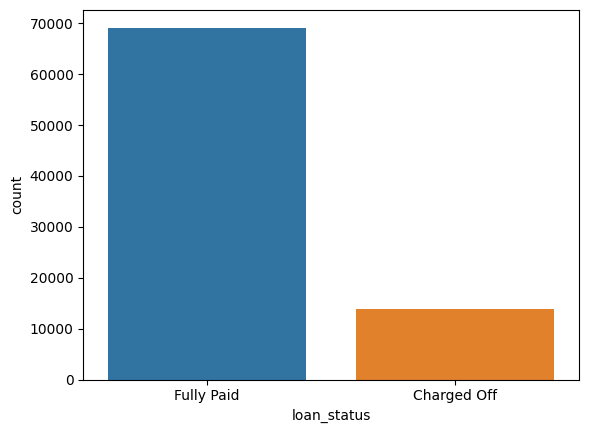

In [ ]:
df1 = df.loc[df['purpose']=='credit_card']
sns.countplot(x=df1['loan_status'])
#almost >1/6 credit card loan takers were unable to pay the loan

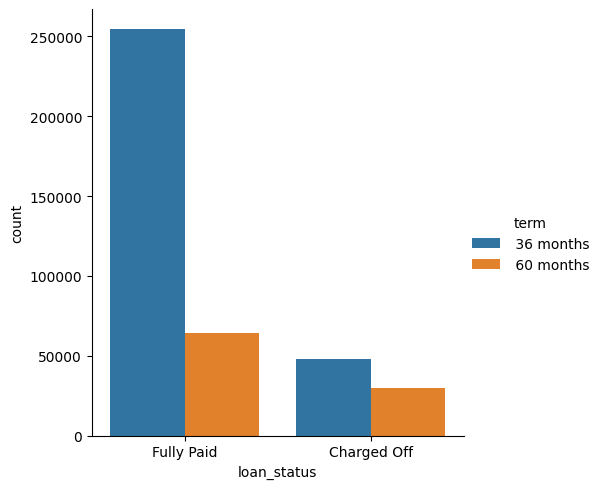

In [ ]:
sns.catplot(x ="loan_status", hue ="term", kind ="count", data = df)
#cat plot of loan status and term

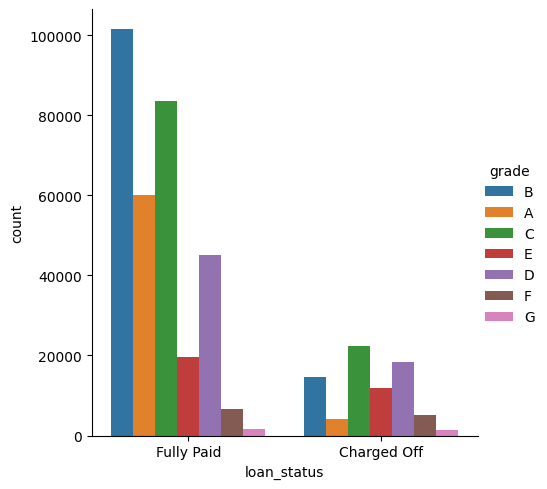

In [ ]:
sns.catplot(x ="loan_status", hue ="grade", kind ="count", data = df)
#cat plot of loan status and grade

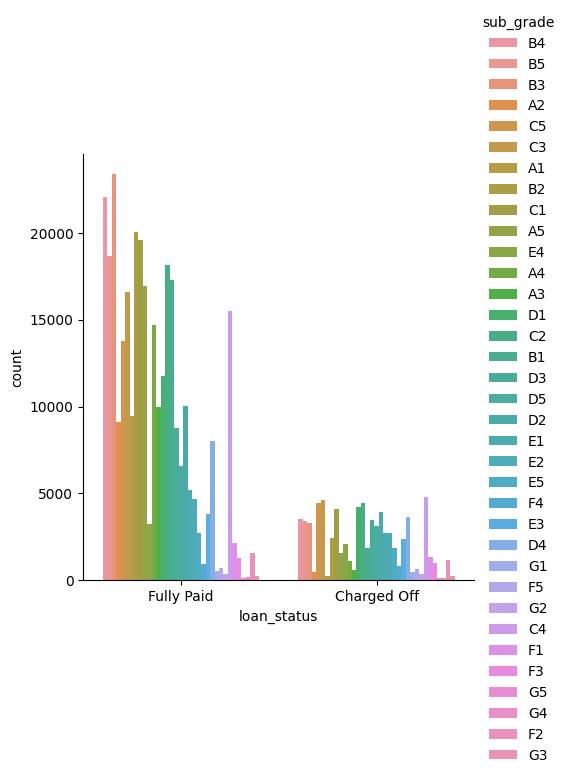

In [ ]:
sns.catplot(x ="loan_status", hue ="sub_grade", kind ="count", data = df)
#cat plot of loan status and subgrade

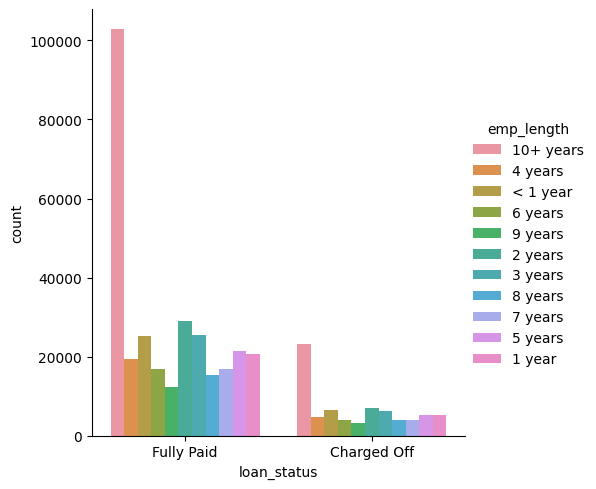

In [ ]:
sns.catplot(x ="loan_status", hue ="emp_length", kind ="count", data = df)
#cat plot of loan status and emp length

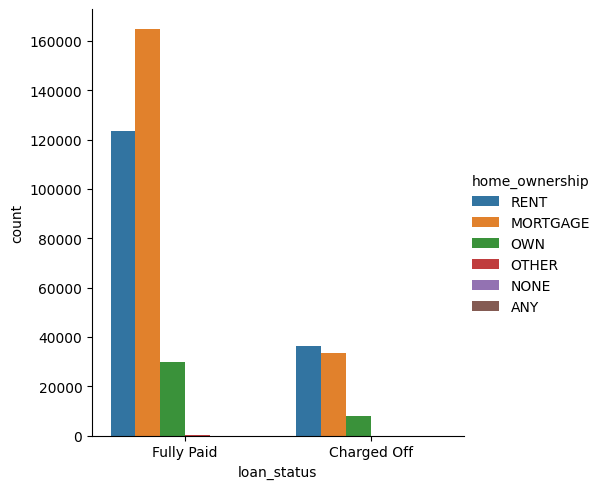

In [ ]:
a = "home_ownership"
sns.catplot(x ="loan_status", hue =a, kind ="count", data = df)
#cat plot of loan status and home ownership

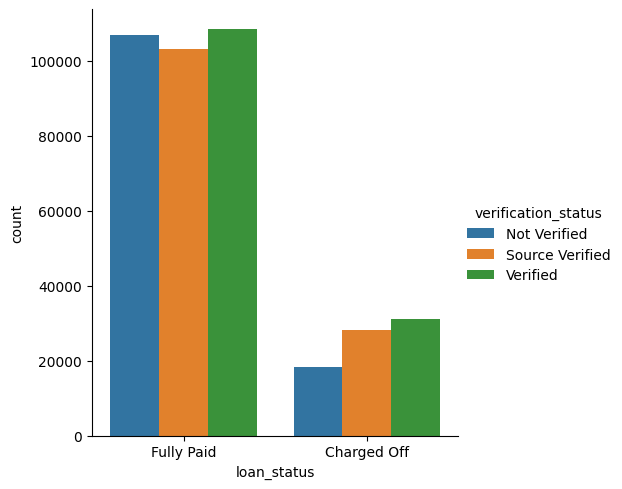

In [ ]:
sns.catplot(x ="loan_status", hue = "verification_status", kind ="count", data = df)
#cat plot of loan status and verification status

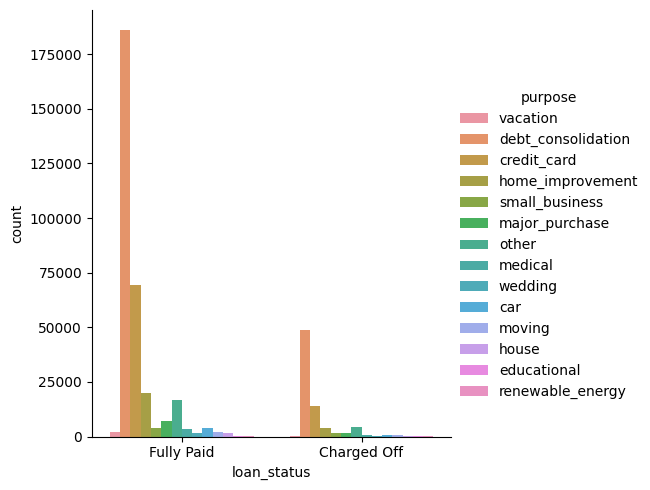

In [ ]:
sns.catplot(x ="loan_status", hue = "purpose", kind ="count", data = df)
#cat plot of loan status and purpose

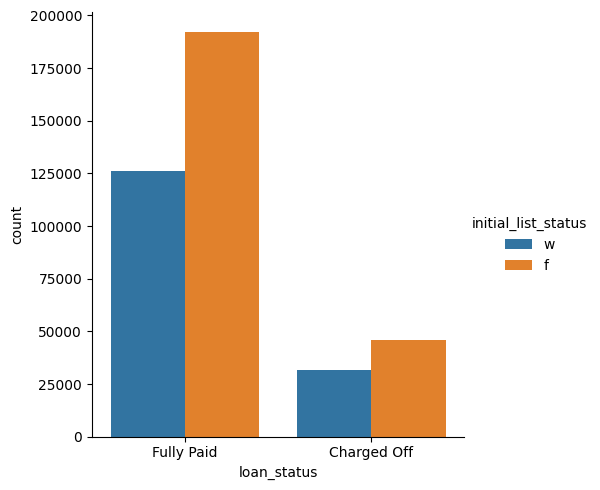

In [ ]:
sns.catplot(x ="loan_status", hue = "initial_list_status", kind ="count", data = df)

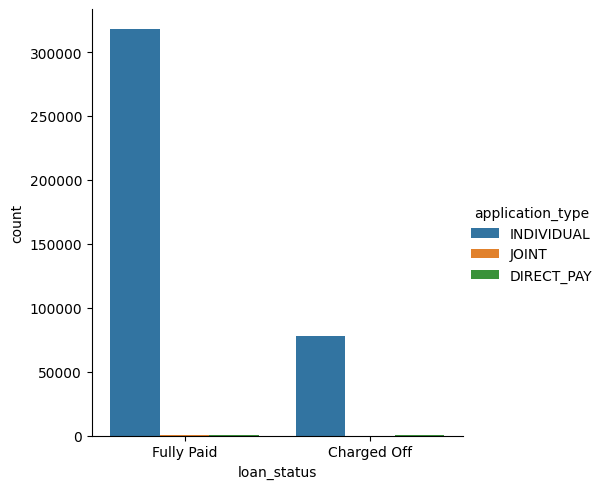

In [ ]:
sns.catplot(x ="loan_status", hue = "application_type", kind ="count", data = df)
#cat plot of loan status and application_type

In [ ]:
# for cat_col in cat_cols:
#     sns.catplot(x ="loan_status", hue = cat_col, kind ="count", data = df)

<Axes: xlabel='term', ylabel='loan_amnt'>

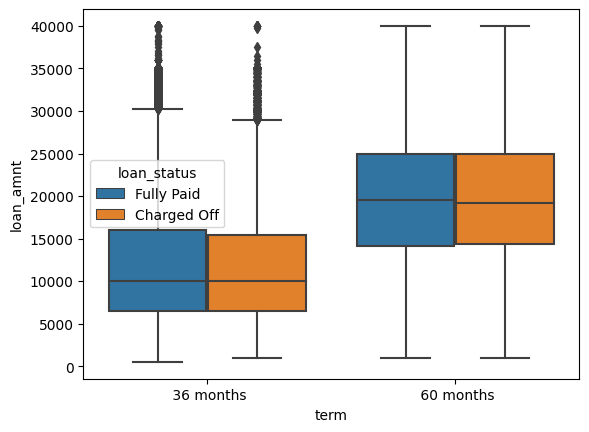

In [ ]:
sns.boxplot(x='term',y='loan_amnt',data=df,hue='loan_status')
#box plot for loan term vs loan_amnt with hue as loan status

<Axes: xlabel='emp_length', ylabel='loan_amnt'>

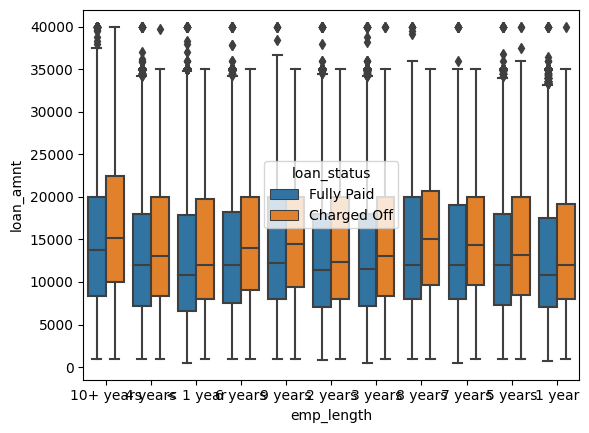

In [ ]:
sns.boxplot(x='emp_length',y='loan_amnt',data=df,hue='loan_status')
#box plot for emp length vs loan_amnt with hue as loan status

<Axes: xlabel='application_type', ylabel='loan_amnt'>

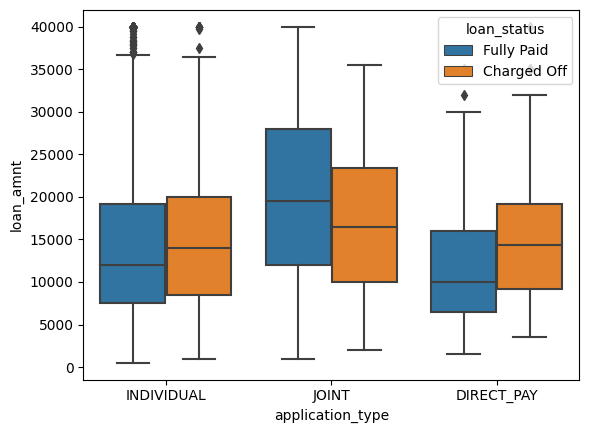

In [ ]:
sns.boxplot(x='application_type',y='loan_amnt',data=df,hue='loan_status')
#box plot for application type vs loan_amnt with hue as loan status

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

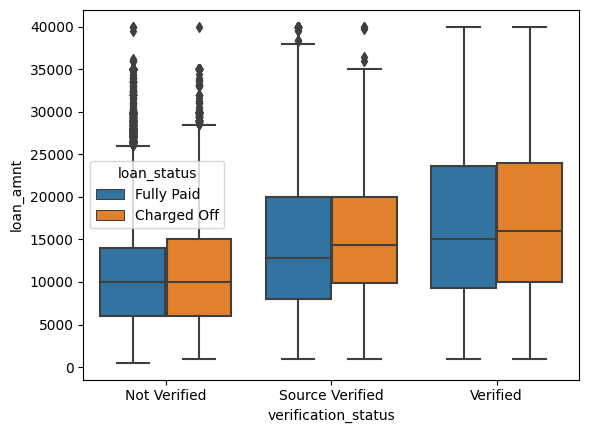

In [ ]:
sns.boxplot(x='verification_status',y='loan_amnt',data=df,hue='loan_status')
#box plot for ver status vs loan_amnt with hue as loan status

In [ ]:
df.corr()
#gives the correlation between two numerical variables

<ipython-input-286-913dc58972e6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


From this correlation information matrix we can decide which features can be taken into account while training the model. High correlation (closer to 1) between two variables mean that they are not independent.

<ipython-input-287-51e907e8afd5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="Purples")


<Axes: >

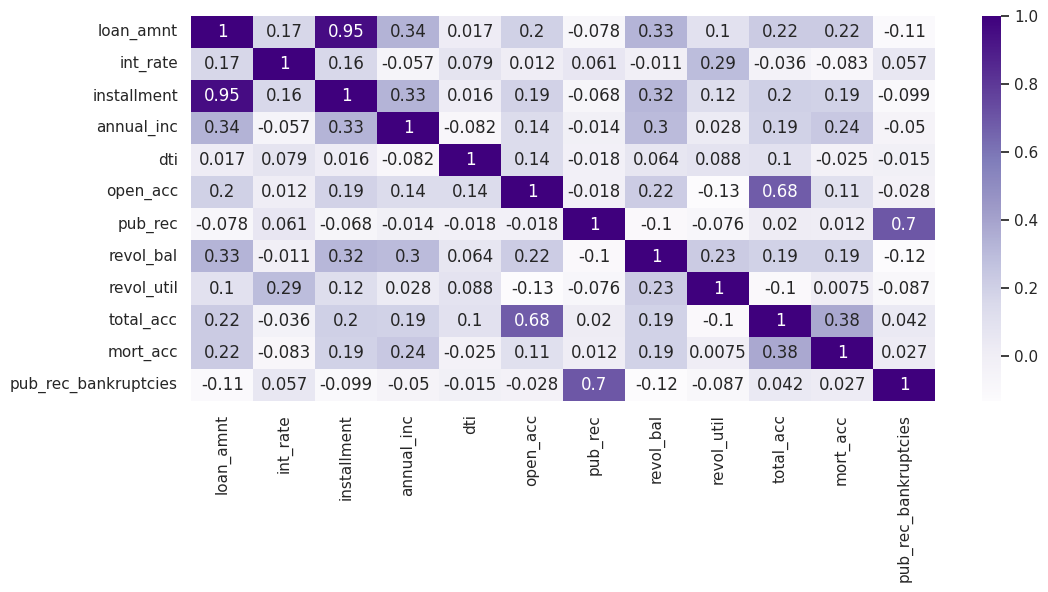

In [ ]:
sns.set(rc={"figure.figsize":(12, 5)})
sns.heatmap(df.corr(),annot=True,cmap="Purples")
#loan-amount:installment,open_acc:total_acc,pubrec:pubrec_bank

In [ ]:
#creation of flags for
# 1. Pub_rec
# 2. Mort_acc
# 3. Pub_rec_bankruptcies

In [ ]:
def encode(x):
    if x > 0:
        return 1
    return 0

In [ ]:
df["pub_rec"]= df["pub_rec"].apply(encode)
df["mort_acc"]= df["mort_acc"].apply(encode)
df["pub_rec_bankruptcies"]= df["pub_rec_bankruptcies"].apply(encode)

In [ ]:
# df_float = df.select_dtypes(include=[float])
# df_float.head()

In [ ]:
df.shape

(396030, 27)

<Axes: ylabel='loan_amnt'>

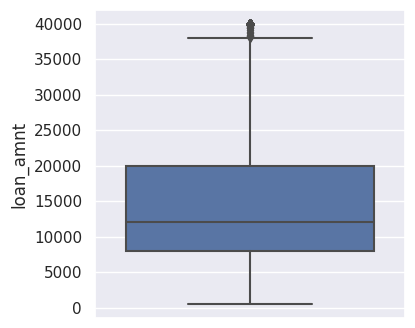

In [ ]:
sns.set(rc={"figure.figsize":(4, 4)})
sns.boxplot(data=df,y=df['loan_amnt'])

<Axes: ylabel='annual_inc'>

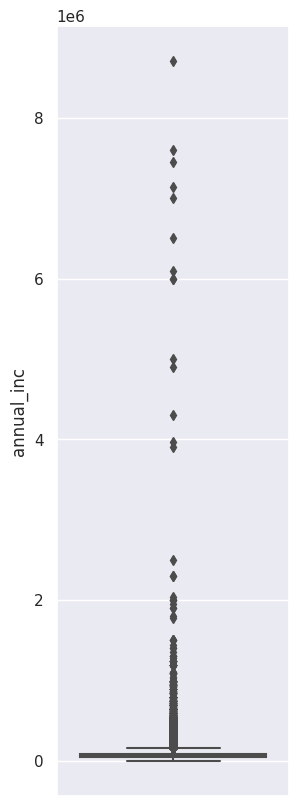

In [ ]:
sns.set(rc={"figure.figsize":(3, 10)})
sns.boxplot(y=df['annual_inc'])

<Axes: xlabel='loan_amnt', ylabel='Count'>

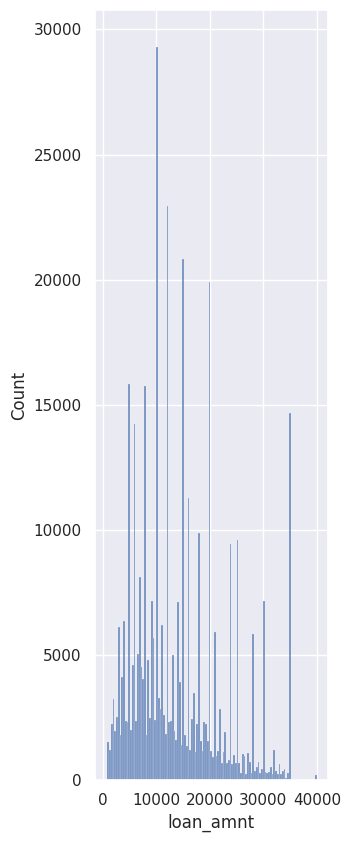

In [ ]:
sns.histplot(x=df['loan_amnt'])

In [ ]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                    0
pub_rec_bankruptcies        0
address                     0
dtype: int64

In [ ]:
df["revol_util"]

0         41.8
1         53.3
2         92.2
3         21.5
4         69.8
          ... 
396025    34.3
396026    95.7
396027    66.9
396028    53.8
396029    91.3
Name: revol_util, Length: 396030, dtype: float64

In [ ]:
#missing value treatment
#there is only one numerical column that has missing values
from sklearn.impute import SimpleImputer
df[["revol_util"]] = SimpleImputer(strategy="median").fit_transform(df[["revol_util"]])

In [ ]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                    0
pub_rec_bankruptcies        0
address                     0
dtype: int64

In [ ]:
df.shape

(396030, 27)

In [ ]:
#missing value imputation for categorical columns
# df["emp_title"]=df["emp_title"].fillna("Unknown")
# df["emp_length"]=df["emp_length"].fillna("Unknown length")
# df["title"]=df["title"].fillna("Unknown title")

#Lets fill missing values for cat variables with mode
cat_cols = ['emp_title','emp_length','title']
freq_imputer = SimpleImputer(strategy='most_frequent')
for col in cat_cols:
    df[col] = pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(df[col])))

In [ ]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [ ]:
#encoding the categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols = cat_cols[:-1]
cat_cols

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'title',
 'earliest_cr_line',
 'initial_list_status',
 'application_type']

In [ ]:
col_labelencode = ['term','grade','home_ownership','verification_status','purpose','application_type','emp_length']
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
for col in col_labelencode:
    print(df[col].value_counts())
    df[col] = label_encoder.fit_transform(df[col])
    print(df[col].value_counts())

 36 months    302005
 60 months     94025
Name: term, dtype: int64
0    302005
1     94025
Name: term, dtype: int64
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64
1    116018
2    105987
0     64187
3     63524
4     31488
5     11772
6      3054
Name: grade, dtype: int64
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64
1    198348
5    159790
4     37746
3       112
2        31
0         3
Name: home_ownership, dtype: int64
Verified           139563
Source Verified    131385
Not Verified       125082
Name: verification_status, dtype: int64
2    139563
1    131385
0    125082
Name: verification_status, dtype: int64
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical    

In [ ]:
#target encoding
col = 'loan_status'
print(df[col].value_counts)
df[col] = label_encoder.fit_transform(df[col])
print(df[col].value_counts)

<bound method IndexOpsMixin.value_counts of 0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 396030, dtype: object>
<bound method IndexOpsMixin.value_counts of 0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_status, Length: 396030, dtype: int64>


In [ ]:
df['loan_status'].value_counts()

1    318357
0     77673
Name: loan_status, dtype: int64

In [ ]:
df.drop(['sub_grade',
 'emp_title',
 'title',
 'issue_d',
 'earliest_cr_line',
 'initial_list_status',
 'application_type','address'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies'],
      dtype='object')

<Axes: >

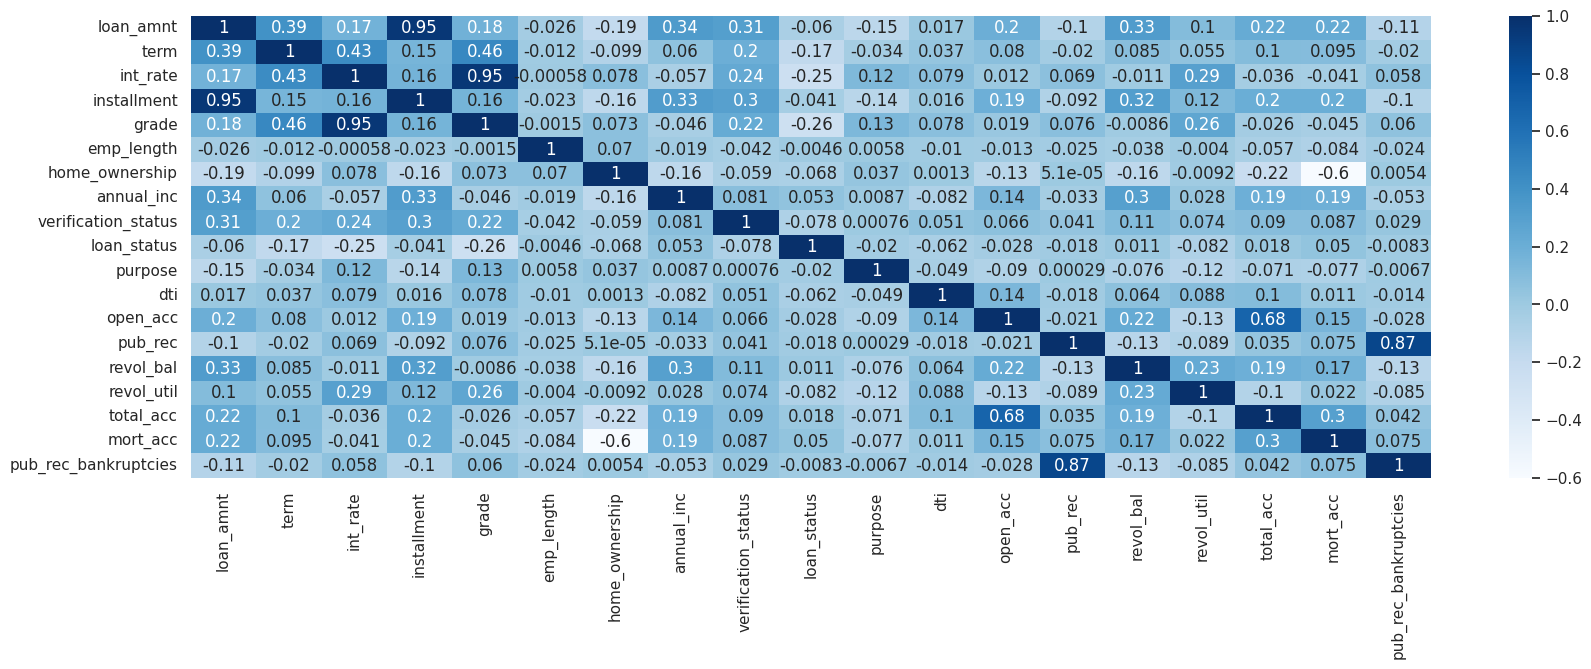

In [ ]:
sns.set(rc={"figure.figsize":(20,6)})
sns.heatmap(df.corr(method='pearson'),annot=True,cmap="Blues")
#loan-amount:installment,open_acc:total_acc,pubrec:pubrec_bank,int_rate:grade
#doubt---plot line =>grade:term

In [ ]:
#Let's remove the outliers for all numerical columns
# q998 = df_float[["loan_amnt","int_rate","installment","annual_inc","dti","open_acc","pub_rec","revol_bal","revol_util","total_acc","mort_acc","pub_rec_bankruptcies"]].quantile(0.998)
# q998 = df_float["loan_amnt"].quantile(0.998)
# df_float_no_out = df_float[df_float['loan_amnt']<q998]

In [ ]:
mint,maxt = df['loan_amnt'].quantile([0.002,0.998])
mint,maxt

(1000.0, 35000.0)

In [ ]:
# df1 = df.loc[df[df['loan_amnt']]>mint & df[df['loan_amnt']]<maxt]
df1 = df.loc[(df['loan_amnt']>mint) & (df['loan_amnt']<maxt)]

In [ ]:
df1.shape

(379735, 19)

In [ ]:
mint,maxt = df['int_rate'].quantile([0.002,0.998])
df2 = df1.loc[(df1['int_rate']>mint) & (df1['int_rate']<maxt)]

In [ ]:
df2.shape

(376610, 19)

In [ ]:
mint,maxt = df['installment'].quantile([0.002,0.998])
df3 = df2.loc[(df2['installment']>mint) & (df2['installment']<maxt)]
df3.describe()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,376516.000000,376516.000000,376516.000000,376516.000000,376516.000000,376516.000000,376516.000000,3.765160e+05,376516.000000,376516.000000,376516.000000,376516.000000,376516.000000,376516.000000,3.765160e+05,376516.000000,376516.000000,376516.000000,376516.000000
mean,13332.409579,0.228197,13.554088,408.793594,1.791831,3.590355,2.931243,7.136036e+04,1.015622,0.804457,2.705710,17.425922,11.228336,0.149184,1.505698e+04,53.798830,25.177103,0.541199,0.117376
std,7372.086410,0.419671,4.359085,219.578025,1.306888,3.157734,1.925635,5.772591e+04,0.816363,0.396619,2.432396,18.389783,5.089422,0.356270,1.820402e+04,24.324248,11.792543,0.498300,0.321868
min,1025.000000,0.000000,5.420000,34.220000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,7600.000000,0.000000,10.370000,246.870000,1.000000,1.000000,1.000000,4.500000e+04,0.000000,1.000000,2.000000,11.320000,8.000000,0.000000,5.931000e+03,36.000000,17.000000,0.000000,0.000000
50%,12000.000000,0.000000,13.180000,365.590000,2.000000,2.000000,4.000000,6.200000e+04,1.000000,1.000000,2.000000,16.950000,10.000000,0.000000,1.089800e+04,54.800000,24.000000,1.000000,0.000000
75%,18000.000000,0.000000,16.290000,539.060000,3.000000,6.000000,5.000000,8.500000e+04,2.000000,1.000000,2.000000,23.040000,14.000000,0.000000,1.883800e+04,72.700000,32.000000,1.000000,0.000000
max,34975.000000,1.000000,26.770000,1284.030000,6.000000,10.000000,5.000000,8.706582e+06,2.000000,1.000000,13.000000,9999.000000,90.000000,1.000000,1.190046e+06,892.300000,135.000000,1.000000,1.000000


In [ ]:
df3.shape

(376516, 19)

In [ ]:
mint,maxt = df['annual_inc'].quantile([0.002,0.998])
df4 = df3.loc[(df3['annual_inc']>mint) & (df3['annual_inc']<maxt)]

In [ ]:
df4.shape

(375204, 19)

In [ ]:
mint,maxt = df['annual_inc'].quantile([0.002,0.998])
df5 = df4.loc[(df4['annual_inc']>mint) & (df4['annual_inc']<maxt)]

In [ ]:
df5.shape

(375204, 19)

In [ ]:
mint,maxt = df['dti'].quantile([0.002,0.998])
df6 = df5.loc[(df5['dti']>mint) & (df5['dti']<maxt)]

In [ ]:
df6.shape

(373775, 19)

In [ ]:
mint,maxt = df['open_acc'].quantile([0.002,0.998])
df7 = df6.loc[(df6['open_acc']>mint) & (df6['open_acc']<maxt)]

In [ ]:
df7.shape

(371735, 19)

In [ ]:
mint,maxt = df['revol_bal'].quantile([0.002,0.998])
df8 = df7.loc[(df7['revol_bal']>mint) & (df7['revol_bal']<maxt)]

In [ ]:
df8.shape

(369723, 19)

In [ ]:
mint,maxt = df['revol_util'].quantile([0.002,0.998])
df9 = df8.loc[(df8['revol_util']>mint) & (df8['revol_util']<maxt)]
df9.describe()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,368701.000000,368701.000000,368701.000000,368701.000000,368701.000000,368701.000000,368701.000000,368701.000000,368701.000000,368701.000000,368701.000000,368701.000000,368701.000000,368701.000000,368701.000000,368701.000000,368701.000000,368701.000000,368701.000000
mean,13357.112810,0.228619,13.548053,409.520549,1.788219,3.590883,2.926748,70364.683941,1.012172,0.804693,2.683749,17.431834,11.241971,0.150279,14746.245041,54.043883,25.204936,0.543427,0.118443
std,7344.260368,0.419944,4.351026,218.637495,1.303732,3.156067,1.926060,38247.612225,0.816027,0.396438,2.408914,8.004698,4.906018,0.357345,14474.506004,23.862313,11.632208,0.498111,0.323132
min,1025.000000,0.000000,5.420000,34.220000,0.000000,0.000000,0.000000,12012.000000,0.000000,0.000000,0.000000,0.370000,3.000000,0.000000,1.000000,0.100000,3.000000,0.000000,0.000000
25%,7800.000000,0.000000,10.370000,248.480000,1.000000,1.000000,1.000000,45000.000000,0.000000,1.000000,2.000000,11.420000,8.000000,0.000000,6050.000000,36.400000,17.000000,0.000000,0.000000
50%,12000.000000,0.000000,13.180000,366.710000,2.000000,2.000000,4.000000,62000.000000,1.000000,1.000000,2.000000,17.000000,10.000000,0.000000,10979.000000,54.900000,24.000000,1.000000,0.000000
75%,18000.000000,0.000000,16.290000,539.060000,3.000000,6.000000,5.000000,85000.000000,2.000000,1.000000,2.000000,23.040000,14.000000,0.000000,18852.000000,72.700000,32.000000,1.000000,0.000000
max,34975.000000,1.000000,26.770000,1284.030000,6.000000,10.000000,5.000000,399996.000000,2.000000,1.000000,13.000000,39.400000,34.000000,1.000000,185618.000000,100.600000,117.000000,1.000000,1.000000


In [ ]:
df9.shape

(368701, 19)

In [ ]:
mint,maxt = df['total_acc'].quantile([0.002,0.998])
df10 = df9.loc[(df9['total_acc']>mint) & (df9['total_acc']<maxt)]
df10.describe()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,367049.000000,367049.000000,367049.000000,367049.000000,367049.000000,367049.000000,367049.000000,367049.000000,367049.000000,367049.000000,367049.000000,367049.000000,367049.000000,367049.000000,367049.000000,367049.000000,367049.000000,367049.000000,367049.000000
mean,13372.224076,0.228847,13.541941,409.949761,1.785925,3.588921,2.922520,70422.669034,1.012238,0.804721,2.679936,17.453534,11.251032,0.150568,14771.679811,54.041262,25.195764,0.544712,0.118660
std,7341.333680,0.420091,4.349601,218.562578,1.302924,3.154633,1.925996,38222.045536,0.815956,0.396416,2.404320,7.992145,4.874131,0.357628,14481.590232,23.843076,11.418033,0.497998,0.323388
min,1025.000000,0.000000,5.420000,34.220000,0.000000,0.000000,0.000000,12012.000000,0.000000,0.000000,0.000000,0.370000,3.000000,0.000000,1.000000,0.100000,5.000000,0.000000,0.000000
25%,7800.000000,0.000000,10.360000,249.080000,1.000000,1.000000,1.000000,45000.000000,0.000000,1.000000,2.000000,11.450000,8.000000,0.000000,6073.000000,36.400000,17.000000,0.000000,0.000000
50%,12000.000000,0.000000,13.180000,367.090000,2.000000,2.000000,4.000000,62000.000000,1.000000,1.000000,2.000000,17.020000,10.000000,0.000000,11003.000000,54.900000,24.000000,1.000000,0.000000
75%,18000.000000,0.000000,16.290000,539.570000,3.000000,6.000000,5.000000,85000.000000,2.000000,1.000000,2.000000,23.050000,14.000000,0.000000,18880.000000,72.700000,32.000000,1.000000,0.000000
max,34975.000000,1.000000,26.770000,1284.030000,6.000000,10.000000,5.000000,399996.000000,2.000000,1.000000,13.000000,39.400000,34.000000,1.000000,185618.000000,100.600000,70.000000,1.000000,1.000000


In [ ]:
df10.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [ ]:
#Outlier removal not done for
# 1. Pub_rec
# 2. Mort_acc
# 3. Pub_rec_bankruptcies

In [ ]:
df_1 = df10
df_1.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,10000.0,0,11.44,329.48,1,1,5,117000.0,0,1,12,26.24,16.0,0,36369.0,41.8,25.0,0,0
1,8000.0,0,11.99,265.68,1,4,1,65000.0,0,1,2,22.05,17.0,0,20131.0,53.3,27.0,1,0
2,15600.0,0,10.49,506.97,1,10,5,43057.0,1,1,1,12.79,13.0,0,11987.0,92.2,26.0,0,0
3,7200.0,0,6.49,220.65,0,6,5,54000.0,0,1,1,2.60,6.0,0,5472.0,21.5,13.0,0,0
4,24375.0,1,17.27,609.33,2,9,1,55000.0,2,0,1,33.95,13.0,0,24584.0,69.8,43.0,1,0


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_1 = df_1.drop('loan_status',axis=1)
X_vals = df_1.iloc[:,:]
#optimum VIF range is 10~50

In [ ]:
df_1.shape

(367049, 18)

In [ ]:
for i in range(0,df_1.shape[1]):
    print("VIF of column",i,variance_inflation_factor(X_vals,i))
    print("\n")

VIF of column 0 250.2909613818844


VIF of column 1 9.365835937897431


VIF of column 2 62.03778283925556


VIF of column 3 226.07748101630148


VIF of column 4 19.3697563998771


VIF of column 5 2.2718631854755778


VIF of column 6 4.77504913890389


VIF of column 7 6.756658751654801


VIF of column 8 2.914466710315811


VIF of column 9 2.417640701306589


VIF of column 10 7.740312229333155


VIF of column 11 12.685981073773423


VIF of column 12 4.955170365739284


VIF of column 13 3.090231736251943


VIF of column 14 8.436647472293602


VIF of column 15 11.835596343269655


VIF of column 16 3.6057293046922214


VIF of column 17 4.769481380760547




In [ ]:
df_1.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [ ]:
# df8.drop(['open_acc',	'pub_rec',	'revol_bal',	'revol_util',	'total_acc','mort_acc',	'pub_rec_bankruptcies'],axis=1,inplace=True)
df_1.drop(['installment'],axis=1,inplace=True)
df_1.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [ ]:
df_1.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,10000.0,0,11.44,1,1,5,117000.0,0,12,26.24,16.0,0,36369.0,41.8,25.0,0,0
1,8000.0,0,11.99,1,4,1,65000.0,0,2,22.05,17.0,0,20131.0,53.3,27.0,1,0
2,15600.0,0,10.49,1,10,5,43057.0,1,1,12.79,13.0,0,11987.0,92.2,26.0,0,0
3,7200.0,0,6.49,0,6,5,54000.0,0,1,2.60,6.0,0,5472.0,21.5,13.0,0,0
4,24375.0,1,17.27,2,9,1,55000.0,2,1,33.95,13.0,0,24584.0,69.8,43.0,1,0


In [ ]:
df10['loan_status'].value_counts(normalize=True)
#this is an imbalanced dataset and will affect our model

1    0.804721
0    0.195279
Name: loan_status, dtype: float64

In [ ]:
df10.loan_status.value_counts()

1    295372
0     71677
Name: loan_status, dtype: int64

In [ ]:
df_1 = df10

In [ ]:
df_1.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,10000.0,0,11.44,329.48,1,1,5,117000.0,0,1,12,26.24,16.0,0,36369.0,41.8,25.0,0,0
1,8000.0,0,11.99,265.68,1,4,1,65000.0,0,1,2,22.05,17.0,0,20131.0,53.3,27.0,1,0
2,15600.0,0,10.49,506.97,1,10,5,43057.0,1,1,1,12.79,13.0,0,11987.0,92.2,26.0,0,0
3,7200.0,0,6.49,220.65,0,6,5,54000.0,0,1,1,2.60,6.0,0,5472.0,21.5,13.0,0,0
4,24375.0,1,17.27,609.33,2,9,1,55000.0,2,0,1,33.95,13.0,0,24584.0,69.8,43.0,1,0


In [ ]:
df_1.drop('installment',axis=1,inplace=True)

<ipython-input-345-f62330a79a90>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop('installment',axis=1,inplace=True)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

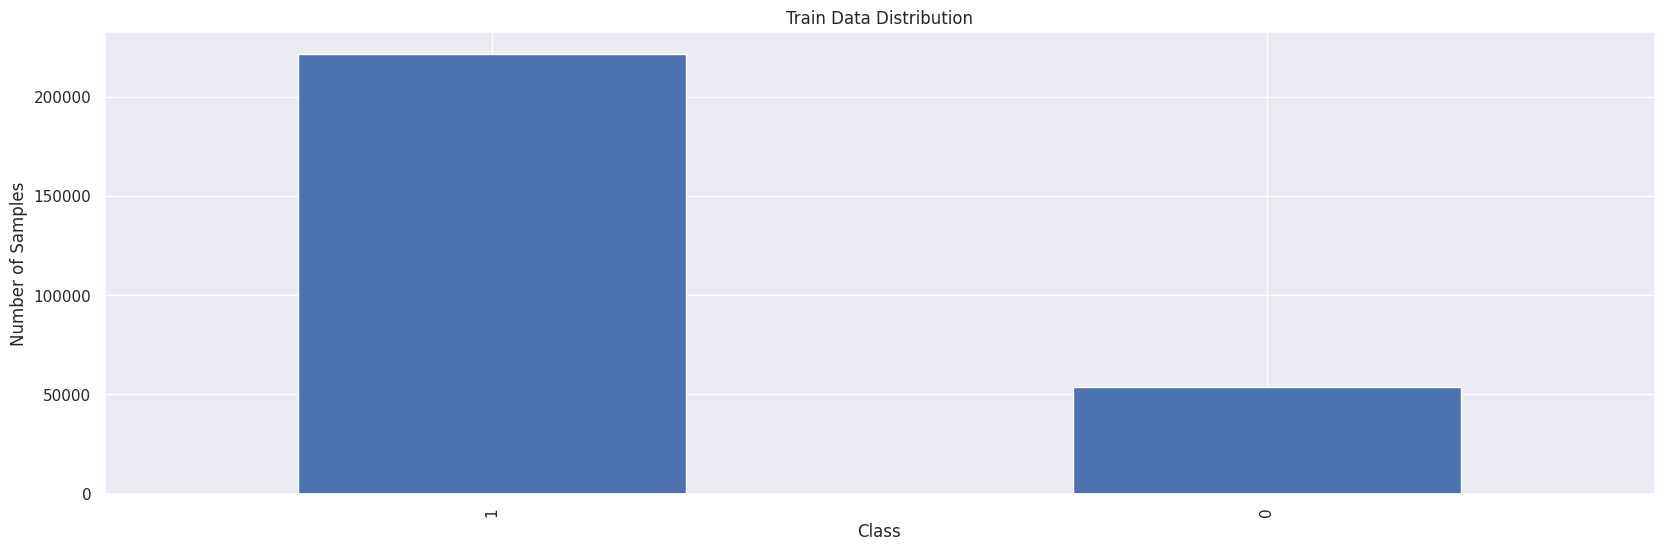

In [ ]:
#SMOTE
y_train.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Train Data Distribution')
plt.show()

<Axes: xlabel='int_rate', ylabel='loan_amnt'>

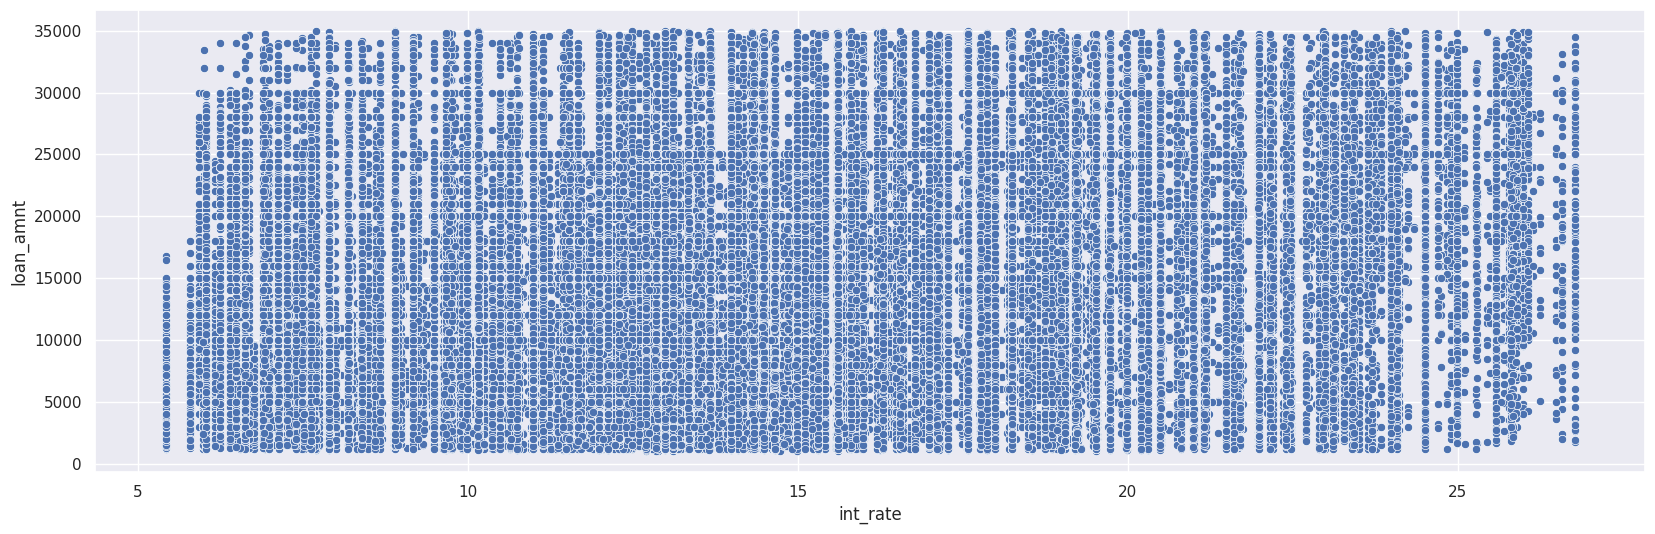

In [ ]:
sns.scatterplot(x='int_rate',y='loan_amnt',data=df_1)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df_1.drop(['loan_status'],axis=1),df_1['loan_status'])
print(f'Training Data:{X_train.shape},{y_train.shape}, Testing Data: {X_test.shape},{y_test.shape}')

Training Data:(275286, 17),(275286,), Testing Data: (91763, 17),(91763,)


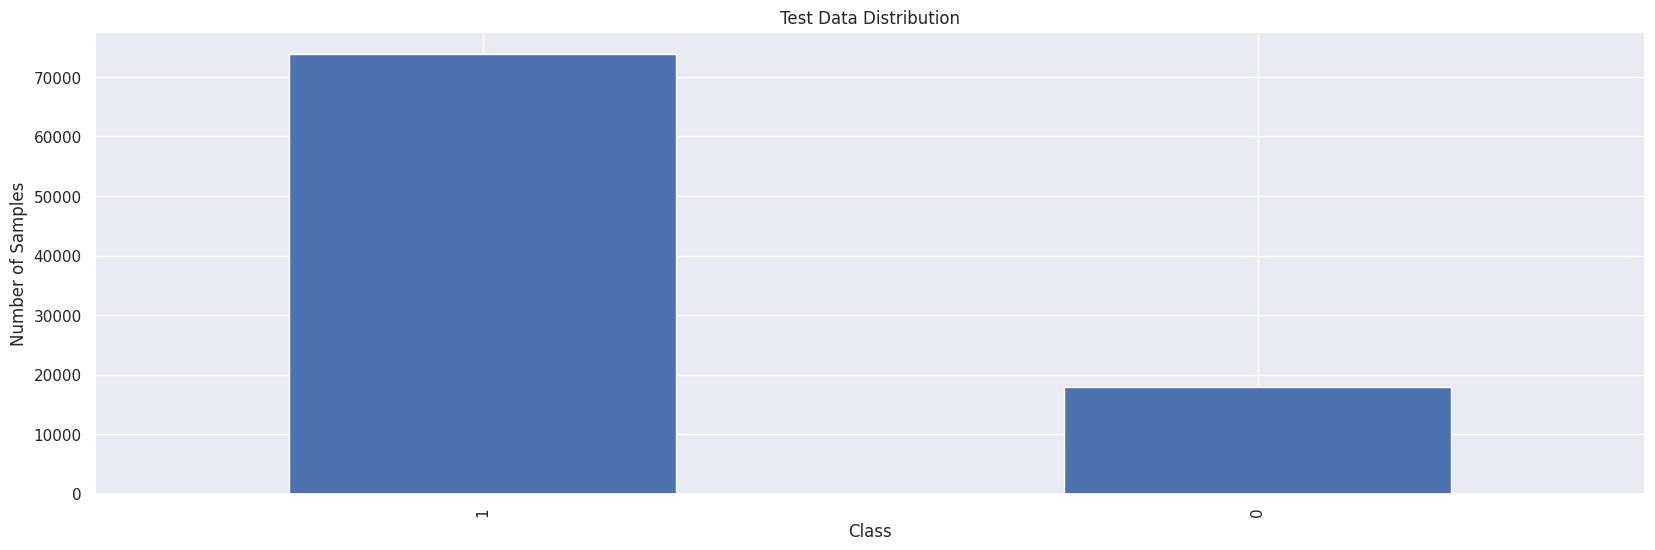

In [ ]:
y_test.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Test Data Distribution')
plt.show()

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
probability = model.predict_proba(X_test)
probability

array([[0.02581576, 0.97418424],
       [0.20416296, 0.79583704],
       [0.1917164 , 0.8082836 ],
       ...,
       [0.13738029, 0.86261971],
       [0.23768635, 0.76231365],
       [0.0939253 , 0.9060747 ]])

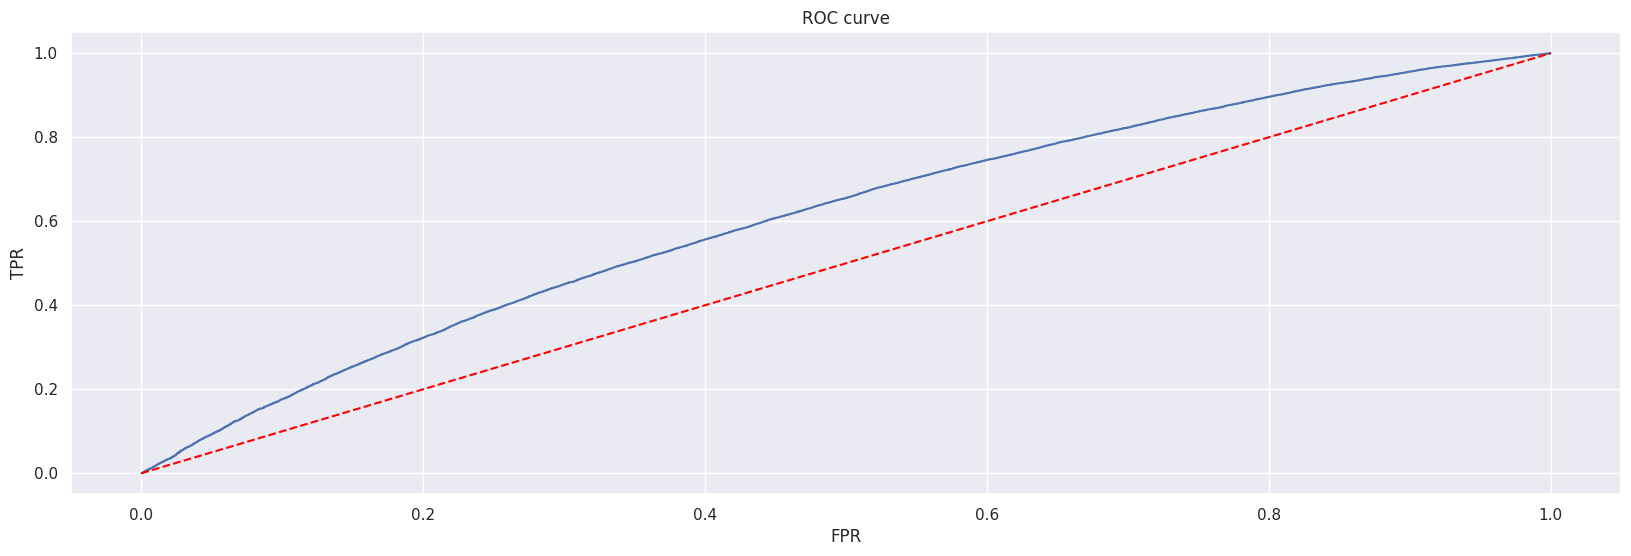

In [ ]:
probabilites = probability[:,1]
fpr, tpr, thr = roc_curve(y_test,probabilites)
plt.plot(fpr,tpr)

#random model
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
roc_auc_score(y_test,probabilites)

0.6098197499199005

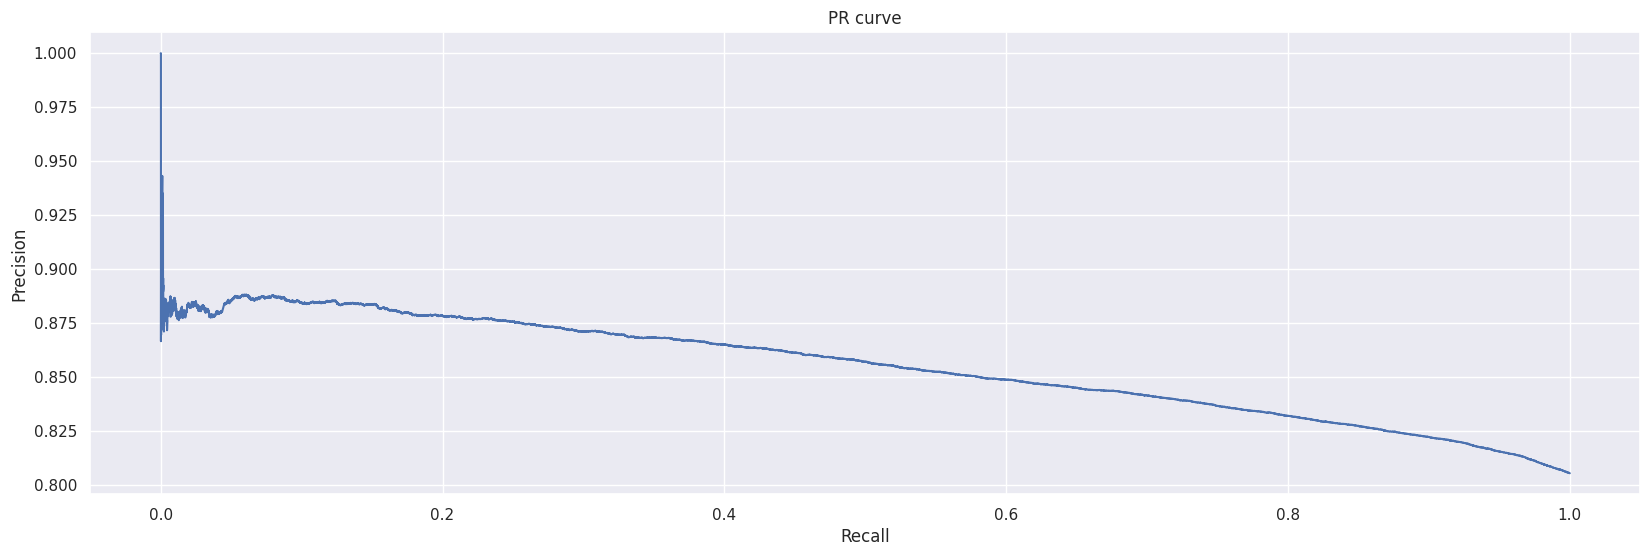

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

precision, recall, thr = precision_recall_curve(y_test, probabilites)

plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [ ]:
auc(recall, precision)

0.854859181231677

In [ ]:
# Model creation, prediction

def training(model,X_train,y_train,X_test,y_test):

  model.fit(X_train, y_train)

  train_y_pred = model.predict(X_train)
  test_y_pred = model.predict(X_test)

  train_score = f1_score(y_train, train_y_pred)
  test_score = f1_score(y_test, test_y_pred)

  return train_score,test_score

In [ ]:
y_train.shape[0]/y_test.shape[0]

2.999967307084555

In [ ]:
# minority class needs more re-weighting
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

model = LogisticRegression(class_weight={0:2.76,1:1})

f1_train,f1_test = training(model,X_train,y_train,X_test,y_test)
print(f'Training F1 score:{f1_train}, Testing F1 score:{f1_test}')

Training F1 score:0.8612790934310166, Testing F1 score:0.8618761808063542


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from imblearn.over_sampling import RandomOverSampler

# Create an instance of RandomOverSampler
oversampler = RandomOverSampler()

# Perform oversampling on the training data
print('Before Oversampling')
print(y_train.value_counts())
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

print('After Oversampling')
print(y_train_oversampled.value_counts())

model = LogisticRegression()

f1_train,f1_test = training(model,X_train_oversampled, y_train_oversampled,X_test,y_test)

print(f'Training F1 score:{f1_train}, Testing F1 score:{f1_test}')

Before Oversampling
1    221457
0     53829
Name: loan_status, dtype: int64
After Oversampling
0    221457
1    221457
Name: loan_status, dtype: int64
Training F1 score:0.5817292078228742, Testing F1 score:0.6706137522715282


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smt = SMOTE()


# Perform SMOTE on the training data
print('Before SMOTE')
print(y_train.value_counts())

X_sm, y_sm = smt.fit_resample(X_train, y_train)
print('After Oversampling')
print(y_train_oversampled.value_counts())

model = LogisticRegression(C= 5, penalty= 'l1', solver = 'liblinear')

f1_train,f1_test = training(model,X_sm, y_sm,X_test,y_test)

print(f'Training F1 score:{f1_train}, Testing F1 score:{f1_test}')

Before SMOTE
1    221457
0     53829
Name: loan_status, dtype: int64
After Oversampling
0    221457
1    221457
Name: loan_status, dtype: int64
Training F1 score:0.7089859776857967, Testing F1 score:0.7691380083677087


In [ ]:
df_1.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [ ]:
cols = ['loan_amnt', 'term', 'int_rate', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status',
       'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies']
X = df_1[cols]
Y = df_1['loan_status']
print(X.shape,Y.shape)

(367049, 17) (367049,)


In [ ]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest = train_test_split(X,Y,test_size = 0.2)#split into 20% test and 80% train
xTrain,xVal,yTrain,yVal = train_test_split(xTrain,yTrain,test_size = 0.25)#now 80% train is split into 60% train and 20% validation
print(xTrain.shape,xVal.shape,xTest.shape)
print(yTrain.shape,yVal.shape,yTest.shape)

(220229, 17) (73410, 17) (73410, 17)
(220229,) (73410,) (73410,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(xTrain)

StandardScaler()

In [ ]:
xTrain = scaler.transform(xTrain)#performs standardization by centering and scaling(mean becomes 0 and output lies bw -1 and 1)
xVal = scaler.transform(xVal)
xTest = scaler.transform(xTest)
print(xTrain.shape,xVal.shape,xTest.shape)

(220229, 17) (73410, 17) (73410, 17)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xTrain,yTrain)

LogisticRegression()

In [ ]:
model.coef_ #gives the weights

array([[-0.09061865, -0.18688706, -0.07114558, -0.36909116, -0.00271687,
        -0.12970366,  0.18789905, -0.03438907, -0.03632701, -0.20107367,
        -0.13140235, -0.09011752,  0.05389135, -0.10253969,  0.11475761,
         0.01097536,  0.0605988 ]])

In [ ]:
model.intercept_

array([1.58163093])

In [ ]:
model.score(xTrain,yTrain)# here the score is the accuracy

0.806424222059765

In [ ]:
model.score(xVal,yVal)

0.8046451437133906

In [ ]:
model.score(xTest,yTest)

0.8083231167415883

In [ ]:
df_1['loan_status']

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_status, Length: 367049, dtype: int64

In [ ]:
#doing the above as earlier
cols = ['loan_amnt', 'term', 'int_rate', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status',
       'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies','loan_status']
X = df_1[cols]
Y = df_1['loan_status']
print(X.shape,Y.shape)
xTrain,xTest,yTrain,yTest = train_test_split(X,Y,test_size = 0.2)#split into 20% test and 80% train
xTrain,xVal,yTrain,yVal = train_test_split(xTrain,yTrain,test_size = 0.25)#now 80% train is split into 60% train and 20% validation

(367049, 18) (367049,)


In [ ]:
yTrain.value_counts()

1    177284
0     42945
Name: loan_status, dtype: int64

In [ ]:
yTest.shape

(73410,)

In [ ]:
yTrain = yTrain.sample(73410)

In [ ]:
yTrain.shape

(73410,)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(y_true=yTrain, y_pred=yTest)

array([[ 2778, 11448],
       [11558, 47626]])

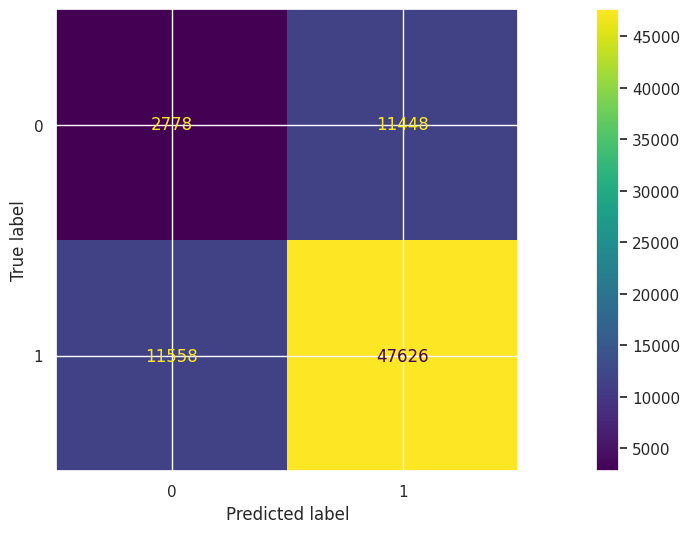

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_true=yTrain, y_pred=yTest)).plot()

In [ ]:
from sklearn.metrics import precision_score, recall_score,f1_score
print(
    "precision:", precision_score(y_true=yTrain, y_pred=yTest)
)
print(
    "recall:", recall_score(y_true=yTrain, y_pred=yTest)
)
print(
    "f1 score:", f1_score(y_true=yTrain, y_pred=yTest)
)

precision: 0.806209161390798
recall: 0.8047107326304407
f1 score: 0.8054592501141571


CALCULATING PR curve and ROC curve after SMOTE

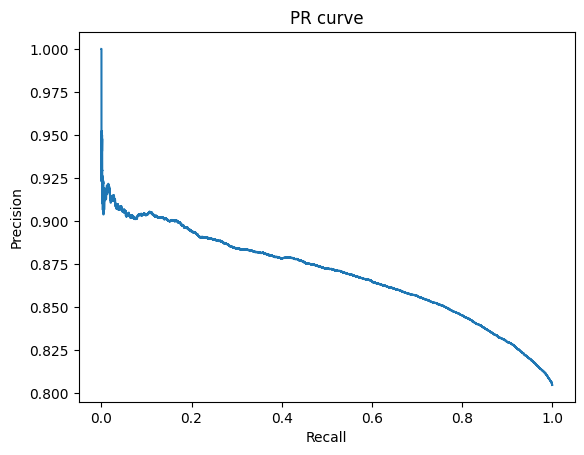

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

precision, recall, thr = precision_recall_curve(yTest, probabilites)

plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

Questionnaire

1.Around 80.38% of customers have fully paid their Loan Amount.

2.There is very high co-relation between loan amount and installment. the co-efficient is ~ 0.95.  This indicates high collinearity between these two features.Hence installment column is drop while creating model.

3.Mortaged(50.07%) and then followed by rent (40.35%)

4.True. Out of all people with grade 'A',  approx 93% got their loan approved.

5. Teacher & Manager. Though there were a lot of null values in the data from emp_title(greater than the most occupied title)

6.
ROC-AUC : Not good metric to consider as we have highly imbalanced data.
Precision: Consider when only want to reduce NPA mostly used in large and well established banks for niche customers
Recall: Consider when we do not want to miss good opportunity for providing loan to customer, mostly used in NBFCs where the business model is based on risk-reward approach
F1-score: Good metric in this casebecause we want to consider both Precision and Recall.
 Therefore the best metric would be to use F1-Score

 7.If Recall value is low then the bank will loosing in opportunity cost. If Precision value is low, then the bank's NPA (defaulters) may increase.

 8. Few important features are
Loan sub-grade
Annual Income
Interest rate
Mortgaged accounts
Purpose
Application Type
Employment Length
Home Ownership
term : number of payments on the loan
debt to income ratio
emp_title

Tradeoff Questions

1. To keep very less False Positives, oversampling techniques like SMOTE should be used in model creation. We can also try various hyperparameter tunning to get the best hyperparameters by splitting the data set into train,test and validation datasets

From the data, the percentage of defaulters is slightly higher in Banking industry making it a high risk reward business


2.Yes. LoanTap should not disburse loans to everyone. Company's internal analysis must be performed prior to loan disbursemnet so that they identify the correct persons. From data provided, 20% of people default on their loan, which inturn become NPAs for the company.

Low False positive means we should create the model with high Precision values. This can be achieved if we are keeping high threshold value in logistic Regression model.

But keeping too high values for threshold will increase False Negatives. This inturn may result in opportunity loss. In this case we will not give loans to persons which will not default but our model has predicted that they will default.

Therefore we must strike a balance between finding the right loan taker and also keep in mind the high possibility og getting back the loan with interest.